In [187]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-classification-dataset/Diabetes Classification.csv


**Import Libraries**

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

**Load Data**

In [189]:
df = pd.read_csv('/kaggle/input/diabetes-classification-dataset/Diabetes Classification.csv')

df.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr',
       'BUN', 'Diagnosis'],
      dtype='object')

In [190]:
df.head()

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,F,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,1,26,M,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,2,33,M,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,3,45,F,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,4,50,F,24,3.6,1.3,0.9,2.1,50.0,2.0,0


In [191]:
unq_num_gender = set(df['Gender'])

print(unq_num_gender)

{'F', 'M', 'f'}


In [192]:
num_gender = []

for i in df['Gender']:
    if(i == 'F'):
        num_gender.append(1)
    elif(i == 'M'):
        num_gender.append(2)
    elif(i == 'f'):
        num_gender.append(1)
    
df['num_gender'] = num_gender

df.drop(columns = 'Gender', inplace = True)

df.head()

,Unnamed: 0,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis,num_gender
0,0,50,24,4.2,0.9,2.4,1.4,46.0,4.7,0,1
1,1,26,23,3.7,1.4,1.1,2.1,62.0,4.5,0,2
2,2,33,21,4.9,1.0,0.8,2.0,46.0,7.1,0,2
3,3,45,21,2.9,1.0,1.0,1.5,24.0,2.3,0,1
4,4,50,24,3.6,1.3,0.9,2.1,50.0,2.0,0,1


In [193]:
X = df.drop('Diagnosis', axis = 1)

y = df['Diagnosis']

In [194]:
X

,Unnamed: 0,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,num_gender
0,0,50,24,4.20,0.90,2.40,1.40,46.0,4.70,1
1,1,26,23,3.70,1.40,1.10,2.10,62.0,4.50,2
2,2,33,21,4.90,1.00,0.80,2.00,46.0,7.10,2
3,3,45,21,2.90,1.00,1.00,1.50,24.0,2.30,1
4,4,50,24,3.60,1.30,0.90,2.10,50.0,2.00,1
...,...,...,...,...,...,...,...,...,...,...
5127,5127,54,23,5.00,1.50,1.24,2.98,77.0,3.50,2
5128,5128,50,22,4.37,2.09,1.37,2.29,47.3,4.40,1
5129,5129,67,24,3.89,1.38,1.14,2.17,70.6,4.73,2
5130,5130,60,29,5.91,1.29,1.73,2.85,50.2,7.33,1


**Split data into train and test**

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
X_train

,Unnamed: 0,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,num_gender
3740,3740,36,20,4.87,0.79,1.580000,2.980000,54.1,3.68,1
949,949,43,22,4.08,0.61,1.740000,2.030000,49.3,4.59,1
3826,3826,25,20,4.60,1.00,1.330000,2.630000,80.0,4.25,2
19,19,33,24,4.20,1.50,1.200000,2.300000,62.0,5.30,1
3049,3049,72,21,5.33,1.55,1.200000,2.940000,65.0,3.56,1
...,...,...,...,...,...,...,...,...,...,...
4426,4426,58,27,4.98,2.48,4.860753,4.860753,68.3,6.24,2
466,466,63,30,3.60,5.10,0.900000,2.500000,63.0,5.90,2
3092,3092,40,16,4.00,0.00,1.000000,2.000000,67.0,4.00,2
3772,3772,42,23,4.00,0.80,1.120000,2.460000,96.0,5.49,2


In [197]:
X_test

,Unnamed: 0,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,num_gender
5106,5106,68,29,5.22,3.55,0.87,2.46,93.8,4.89,2
2186,2186,28,22,4.38,1.17,1.39,1.87,46.0,4.00,1
2589,2589,54,18,4.09,0.96,1.43,2.50,81.7,7.68,2
831,831,40,19,5.87,1.29,1.75,3.37,61.1,4.10,1
1421,1421,41,22,4.50,0.50,1.75,1.94,52.0,3.12,1
...,...,...,...,...,...,...,...,...,...,...
1662,1662,53,23,4.03,1.57,1.03,2.56,72.4,6.00,2
833,833,36,26,6.69,3.49,0.91,3.64,67.5,3.86,2
366,366,69,32,5.30,3.80,1.40,2.30,243.0,14.50,1
3778,3778,30,19,4.11,1.27,1.27,2.40,88.8,6.11,2


In [198]:
y_train

3740    0
949     0
3826    0
19      0
3049    0
       ..
4426    1
466     1
3092    0
3772    0
860     0
Name: Diagnosis, Length: 4105, dtype: int64

In [199]:
y_test

5106    1
2186    0
2589    0
831     0
1421    0
       ..
1662    0
833     0
366     1
3778    0
1235    0
Name: Diagnosis, Length: 1027, dtype: int64

**Apply Model**

In [200]:
rf_classifier = RandomForestClassifier(random_state = 42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [201]:
y_pred = RandomForestClassifier.predict(rf_classifier, X_test)

**Check Accuracy**

In [202]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9980525803310614


**Visualization**

In [203]:
test_zeros_sum = 0
test_ones_sum = 0

for i in y_test:
    if(i == 0):
        test_zeros_sum += 1
    elif(i == 1):
        test_ones_sum += 1

In [204]:
pred_zeros_sum = 0
pred_ones_sum = 0

for i in y_pred:
    if(i == 0):
        pred_zeros_sum += 1
    elif(i == 1):
        pred_ones_sum += 1

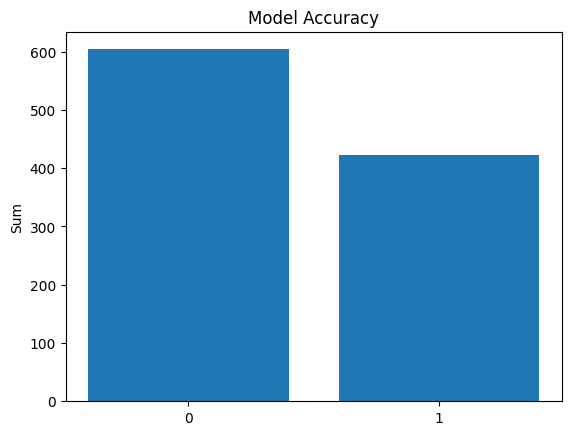

In [205]:
categories_test = ['0', '1']
values = [test_zeros_sum, test_ones_sum]

plt.bar(categories_test, values, linestyle='-')
plt.title('Model Accuracy')
plt.xlabel('')
plt.ylabel('Sum')
plt.show()

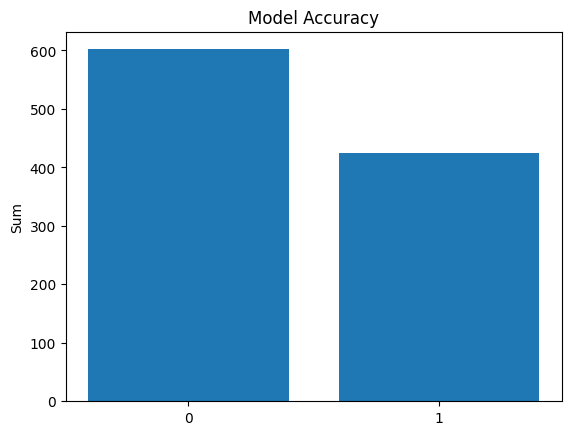

In [206]:
categories_pred = ['0', '1']
values = [pred_zeros_sum, pred_ones_sum]

plt.bar(categories_test, values, linestyle='-')
plt.title('Model Accuracy')
plt.xlabel('')
plt.ylabel('Sum')
plt.show()

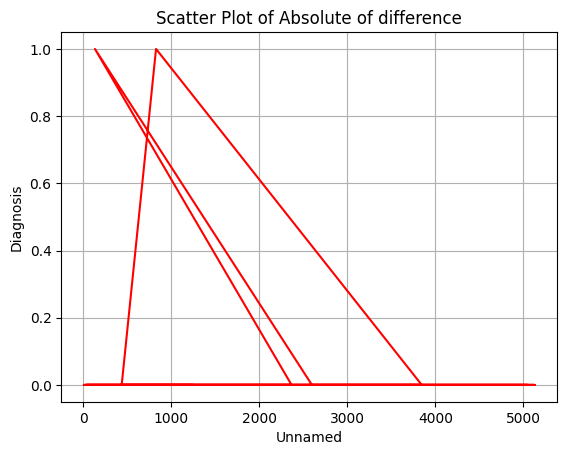

In [207]:
# Create the scatter plot for test
plt.plot(X_test['Unnamed: 0'], abs(y_test - y_pred), color='red')

# Add labels and title
plt.xlabel('Unnamed')
plt.ylabel('Diagnosis')
plt.title('Scatter Plot of Absolute of difference')

# Show the plot
plt.grid(True)  # Add gridlines
plt.show()